# Main Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Building Machine Learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb

# Reading Data

In [2]:
data_train = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\Binary Classification with a Bank Churn Dataset\train.csv")
data_test = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\Binary Classification with a Bank Churn Dataset\test.csv")

test_id = data_test["id"].values

In [3]:
data_train.head(2)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0


In [4]:
data_test.head(2)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.0,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.0,1,1.0,0.0,72549.27


# Make Preprocessing & Analysis

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
data_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## Remove The Columns is Not Usefull

In [7]:
def drop_col(data):
    data = data.drop(columns=["CustomerId", "id", "Surname"], axis=1)
    return data

data_train = drop_col(data_train)
data_test = drop_col(data_test)

In [8]:
data_train.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [9]:
data_test.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [10]:
data_train["Balance"].describe()

count    165034.000000
mean      55478.086689
std       62817.663278
min           0.000000
25%           0.000000
50%           0.000000
75%      119939.517500
max      250898.090000
Name: Balance, dtype: float64

In [11]:
data_train["Balance"].value_counts()

0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
125824.21        1
158741.56        1
126815.52        1
61172.57         1
110993.29        1
Name: Balance, Length: 30075, dtype: int64

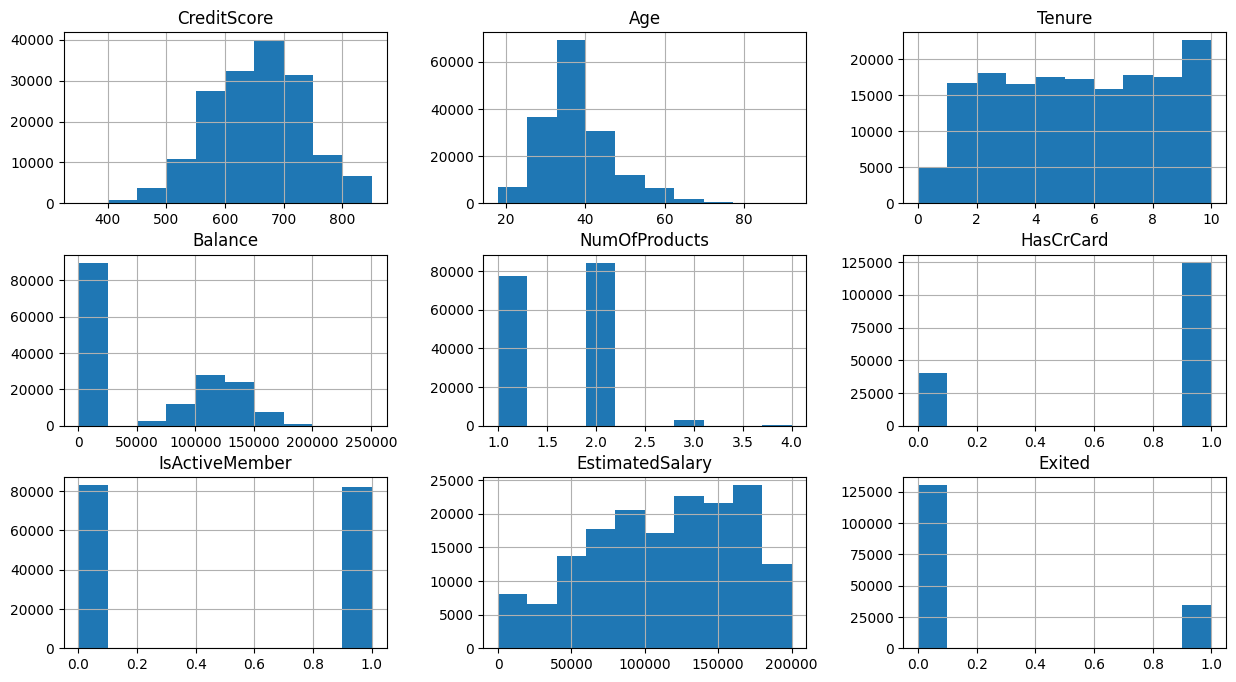

In [12]:
data_train.hist(figsize=(15, 8));

C:\Users\osama\AppData\Local\Temp\ipykernel_19868\2730940749.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_train.corr(), cmap="Blues", annot=True, fmt="0.1f", square=True);


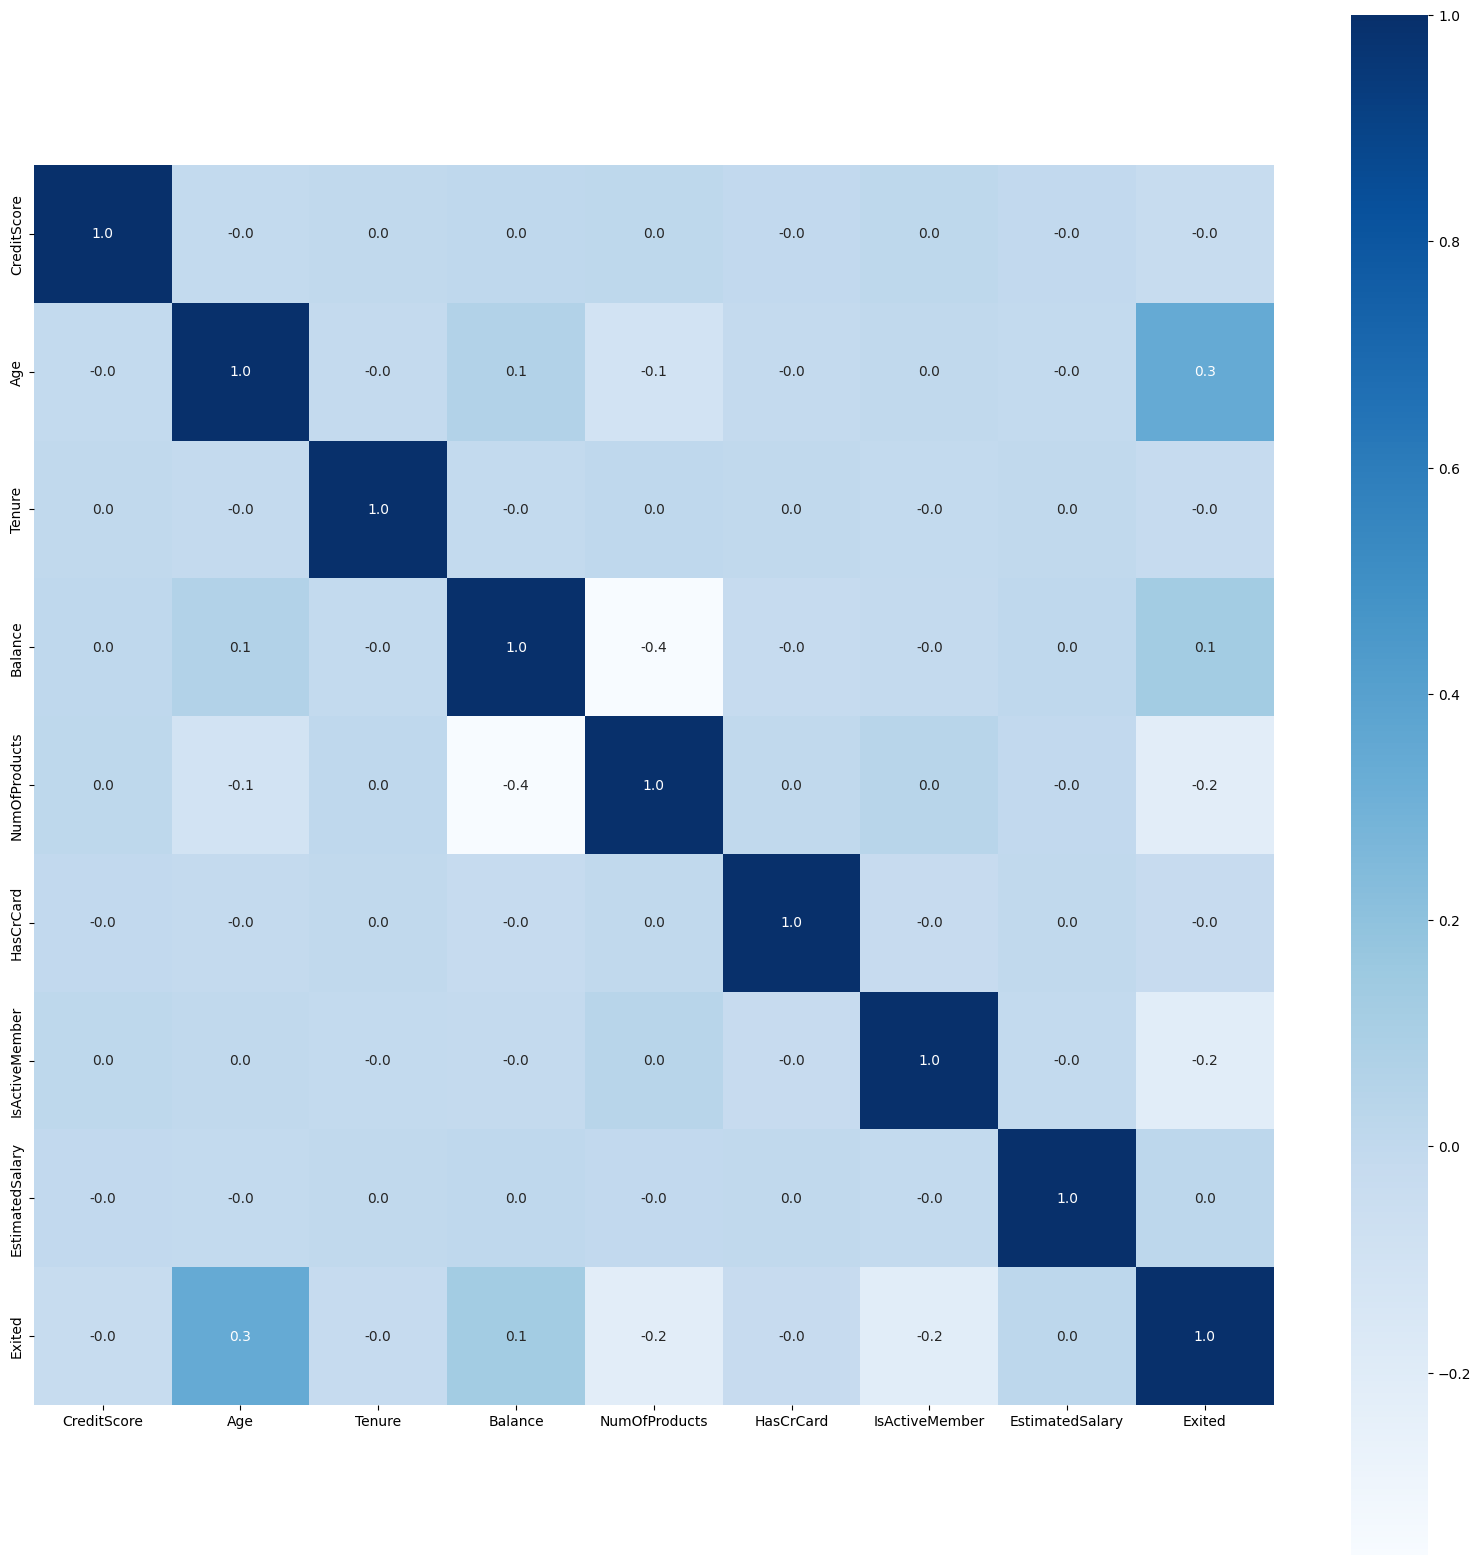

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_train.corr(), cmap="Blues", annot=True, fmt="0.1f", square=True);

In [ ]:
sns.pairplot(data_train);

In [14]:
data_train.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [15]:
data_test.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


# Make Encoding ==> Data

In [16]:
def Encoding_data(data):
    la = LabelEncoder()
    col = ["Geography", "Gender"]
    for i in col:
        data[i] = la.fit_transform(data[i])
    return data

data_train = Encoding_data(data_train)
data_test = Encoding_data(data_test)

In [17]:
data_train.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,627,0,1,33.0,1,0.0,2,1.0,1.0,49503.50,0


In [18]:
data_test.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,0,0,23.0,2,0.0,2,0.0,1.0,160976.75
1,683,0,0,46.0,2,0.0,1,1.0,0.0,72549.27


# Make Normalization

In [19]:
minimax = MinMaxScaler(feature_range=(0, 1))

data_train[["CreditScore", "Balance", "EstimatedSalary", "Age"]] = minimax.fit_transform(data_train[["CreditScore", "Balance", "EstimatedSalary", "Age"]])
data_test[["CreditScore", "Balance", "EstimatedSalary", "Age"]] = minimax.transform(data_test[["CreditScore", "Balance", "EstimatedSalary", "Age"]])

In [20]:
data_train.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.636,0,1,0.202703,3,0.000000,2,1.0,0.0,0.907279,0
1,0.554,0,1,0.202703,1,0.000000,2,1.0,1.0,0.247483,0
2,0.656,0,1,0.297297,10,0.000000,2,1.0,0.0,0.924364,0
3,0.462,0,1,0.216216,2,0.593398,1,1.0,1.0,0.422787,0


In [21]:
data_test.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.472,0,0,0.067568,2,0.0,2,0.0,1.0,0.804903
1,0.666,0,0,0.378378,2,0.0,1,1.0,0.0,0.362723
2,0.612,0,0,0.216216,7,0.0,2,1.0,0.0,0.694419
3,0.662,0,1,0.243243,8,0.0,1,1.0,0.0,0.569654


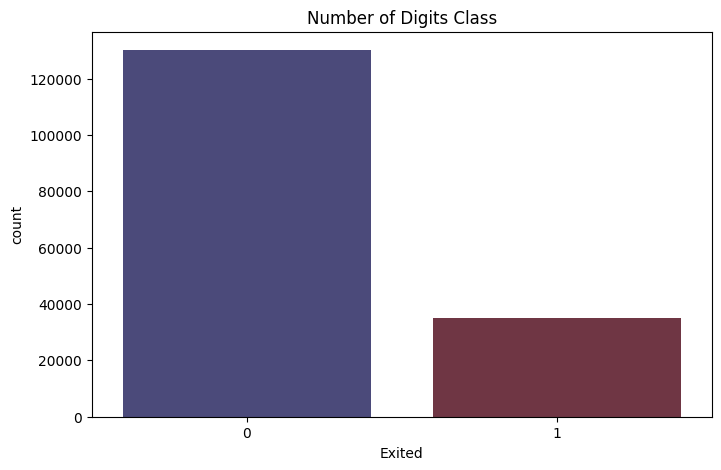

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data_train["Exited"], palette="icefire")
plt.title("Number of Digits Class")
plt.show()

# Make Over Sampling

In [23]:
X = data_train.drop(columns="Exited", axis=1)
Y = data_train["Exited"]

smote = SMOTE()
new_x, new_y = smote.fit_resample(X, Y)
data_train = pd.concat([new_x, new_y], axis=1)

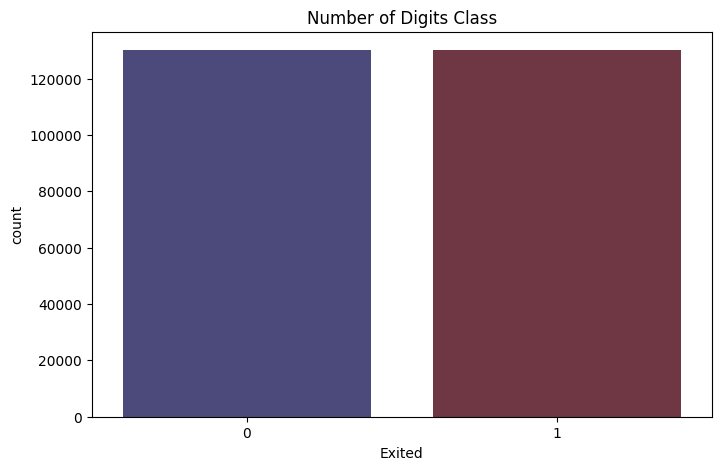

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data_train["Exited"], palette="icefire")
plt.title("Number of Digits Class")
plt.show()

In [25]:
data_train.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.636,0,1,0.202703,3,0.000000,2,1.0,0.0,0.907279,0
1,0.554,0,1,0.202703,1,0.000000,2,1.0,1.0,0.247483,0
2,0.656,0,1,0.297297,10,0.000000,2,1.0,0.0,0.924364,0
3,0.462,0,1,0.216216,2,0.593398,1,1.0,1.0,0.422787,0
4,0.732,2,1,0.202703,5,0.000000,2,1.0,1.0,0.075293,0


In [26]:
data_train.shape

(260226, 11)

# ---------------------------------------------------------------------------------------------

In [27]:
data_train.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.636,0,1,0.202703,3,0.000000,2,1.0,0.0,0.907279,0
1,0.554,0,1,0.202703,1,0.000000,2,1.0,1.0,0.247483,0
2,0.656,0,1,0.297297,10,0.000000,2,1.0,0.0,0.924364,0
3,0.462,0,1,0.216216,2,0.593398,1,1.0,1.0,0.422787,0


In [28]:
data_test.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.472,0,0,0.067568,2,0.0,2,0.0,1.0,0.804903
1,0.666,0,0,0.378378,2,0.0,1,1.0,0.0,0.362723
2,0.612,0,0,0.216216,7,0.0,2,1.0,0.0,0.694419
3,0.662,0,1,0.243243,8,0.0,1,1.0,0.0,0.569654


# Splitting Data

In [29]:
X = data_train.drop(columns="Exited", axis=1)
Y = data_train["Exited"]

Y.value_counts()

0    130113
1    130113
Name: Exited, dtype: int64

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

# Building Model

## 1 - RandomForest Classifier

In [31]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train, y_train)

print(f"The Accuracy SCore Train is {model_RF.score(x_train, y_train)}")
print(f"The Accuracy SCore Test is {model_RF.score(x_test, y_test)}")

The Accuracy SCore Train is 0.9999176539048519
The Accuracy SCore Test is 0.8869575242096633


# 2 - AdaBoostClassifier

In [ ]:
model_AD = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1000, 
                                                                min_samples_split=5,
                                                                min_samples_leaf=3),
                              n_estimators=100,
                              learning_rate=0.01)


model_AD.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_AD.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_AD.score(x_test, y_test)}")

# 3 - XGBClassifier

In [ ]:
model_xgb = xgb.XGBClassifier(n_estimators=100, max_depth=150,
                              max_leaves=5,
                              learning_rate=0.1,
                             )

model_xgb.fit(x_train, y_train)


print(f"The predict Score Train is ==> {model_xgb.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_xgb.score(x_test, y_test)}")

# 4 - LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lg = LogisticRegression(max_iter=10000)

model_lg.fit(x_train, y_train)


print(f"The predict Score Train is ==> {model_lg.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_lg.score(x_test, y_test)}")

# 5 - Deep Learning Model

# Make Submition

In [ ]:
submition_test1 = model_RF.predict_proba(data_test)
submition_test2 = model_AD.predict_proba(data_test)
submition_test3 = model_xgb.predict_proba(data_test)
submition_test4 = model_lg.predict_proba(data_test)

In [33]:
submition_test1 = pd.DataFrame(submition_test1,columns=['Not Exit','Exited'])

submition_test1.head(2)

,Not Exit,Exited
0,0.98,0.02
1,0.04,0.96


In [ ]:
submition_test2 = pd.DataFrame(submition_test2,columns=['Not Exit','Exited'])

submition_test2.head(2)

In [ ]:
submition_test3 = pd.DataFrame(submition_test3,columns=['Not Exit','Exited'])

submition_test3.head(2)

In [ ]:
submition_test4 = pd.DataFrame(submition_test4,columns=['Not Exit','Exited'])

submition_test4.head(2)

In [34]:
new_data_submiition = pd.DataFrame({"id": test_id,
                                   "Exited": submition_test1["Exited"]})

In [35]:
new_data_submiition.head()

,id,Exited
0,165034,0.02
1,165035,0.96
2,165036,0.03
3,165037,0.26
4,165038,0.45


In [36]:
new_data_submiition.to_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\Binary Classification with a Bank Churn Dataset\submition_rf.csv", index=False)